# Names: Ali Hisham Farouq , Sahar Hamdi Abdulhafeez
# IDs: 20200335 , 20201089

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to a NumPy array

In [282]:
image = Image.open(r"dogg.jpg")
image_array = np.array(image)/255.0

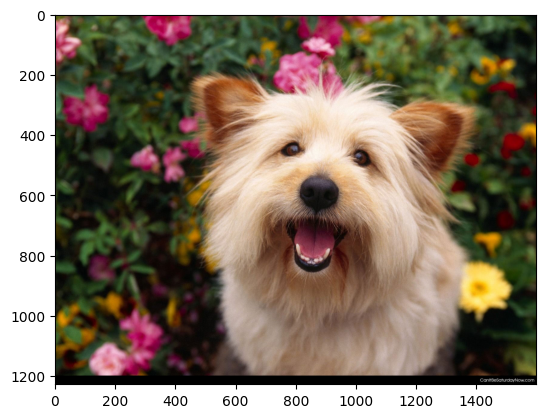

In [307]:
plt.imshow(image)

In [284]:
image_array

array([[[0.44705882, 0.41176471, 0.15686275],
        [0.43137255, 0.39607843, 0.14117647],
        [0.42352941, 0.39215686, 0.14509804],
        ...,
        [0.05490196, 0.08235294, 0.05098039],
        [0.04705882, 0.0745098 , 0.04313725],
        [0.03529412, 0.0627451 , 0.03137255]],

       [[0.43921569, 0.40784314, 0.15294118],
        [0.42745098, 0.39607843, 0.14117647],
        [0.43137255, 0.4       , 0.14509804],
        ...,
        [0.04313725, 0.07058824, 0.03921569],
        [0.05098039, 0.07843137, 0.04705882],
        [0.05882353, 0.08627451, 0.05490196]],

       [[0.41176471, 0.38431373, 0.11764706],
        [0.40784314, 0.38039216, 0.11372549],
        [0.40784314, 0.38823529, 0.12941176],
        ...,
        [0.03921569, 0.06666667, 0.03921569],
        [0.05098039, 0.07843137, 0.05098039],
        [0.06666667, 0.09411765, 0.06666667]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [285]:
image_array.shape

(1228, 1600, 3)

# PCA Impelementation

**1- Mean and Covariance**

In [286]:
# Reshape the image data
h, w, d = image_array.shape
image_2d = image_array.reshape(h * w, d)

In [287]:
image_mean = np.mean(image_2d, axis=0)
std = np.std(image_2d , axis = 0)
standardization = (image_2d - image_mean) / std
cov_matrix = np.cov(standardization, rowvar=False)

In [288]:
cov_matrix

array([[1.00000051, 0.89981527, 0.90346193],
       [0.89981527, 1.00000051, 0.90981152],
       [0.90346193, 0.90981152, 1.00000051]])

**2- Eigen Vectors and Eigen Values**

In [289]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [290]:
eigenvalues

array([2.80873262, 0.10147428, 0.08979463])

In [291]:
eigenvectors

array([[ 0.57618814,  0.80337143, -0.15033818],
       [ 0.57754388, -0.53035977, -0.62061387],
       [ 0.57831678, -0.27076346,  0.76956926]])

In [292]:
# sorting of Eigen values and eigen vetors 
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [301]:
#determine the number of PCAs
n_components = 200
selected_components = eigenvectors[:, :n_components]

# Compress the projected image array

In [302]:
# Transform the image data using the selected components
transformed = np.dot(standardization, selected_components)

# Decompress the compressed image array

In [303]:
# Reconstruct the compressed image
reconstructed = np.dot(transformed, selected_components.T)

# Reshape the reconstructed image to its original shape
reconstructed_image = reconstructed.reshape((h, w, d))

# Plot the Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


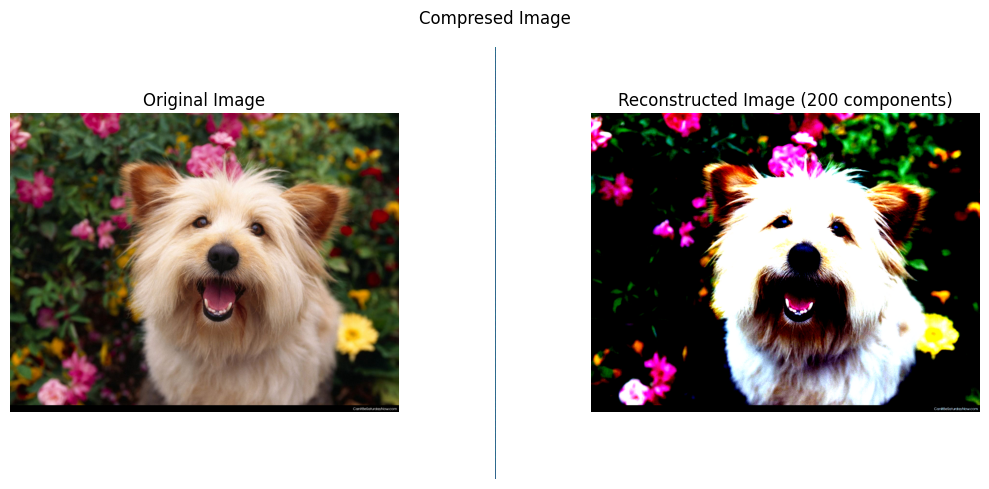

In [316]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed)
plt.title('Compresed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image)
plt.title(f'Reconstructed Image ({n_components} components)')
plt.axis('off')

plt.tight_layout()
plt.show()